# a)

For a noise variance of 0.0196, the process U has a variance of approximately 1

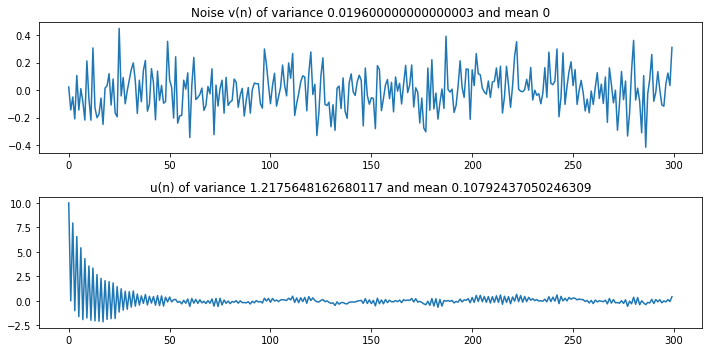

In [31]:
#unit variance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mean_v = 0
std_v = 0.14
N = 300
a1 = 0.1
a2 = -0.8
v = np.random.normal(mean_v, std_v, size=N)#noise
u = np.zeros(N)
u[0]=10
for i in range(2,N,1):
    u[i] = -a1*u[i-1]-a2*u[i-2]+v[i]#AR process
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(v)
plt.title('Noise v(n) of variance '+format(std_v**2)+' and mean 0')
plt.subplot(212)
plt.plot(u)
plt.title('u(n) of variance '+format(np.std(u)**2)+' and mean '+format(np.mean(u)))
plt.tight_layout()
plt.show()

# b)

a1 and a2 are the tap weights

In [32]:
w=np.zeros((N+1,2))#2 tap weights
f=np.zeros(N)
mu=0.05
f[0]=u[0]
w[0][0]=0
w[0][1]=0

for i in range(N):
    f[i]=u[i]-(np.dot(w[i][0],u[i-1])+np.dot(w[i][1],u[i-2]))#predictor error
    w[i+1][0]=w[i][0]+mu*u[i-1]*f[i]#first tap weigh
    w[i+1][1]=w[i][1]+mu*u[i-2]*f[i]#second tap weigh

When mu is small, like in this case, the LMS algorithm behaves like a low-pass filter with a small cutoff frequency. For small mu, the pole lies inside of, and very close to, the unit circle in the z-plane, which implies a very low cutoff frequency.

In [33]:
#The transfer function of the low pass filter has a single pole at:
z=1-(mu*pow(np.std(u)**2,2))
print(z, ' For small mu, the pole lies inside of, and very close to, the unit circle in the z-plane, which implies a very low cutoff frequency.')

0.9258767959093122  For small mu, the pole lies inside of, and very close to, the unit circle in the z-plane, which implies a very low cutoff frequency.


For small mu, the pole lies inside of, and very close to, the unit circle in the z-plane, which implies a very low cutoff frequency.

# c)


The prediction error f is computed previously in cell [2] 

as we can see in the plot, it behaves like random noise

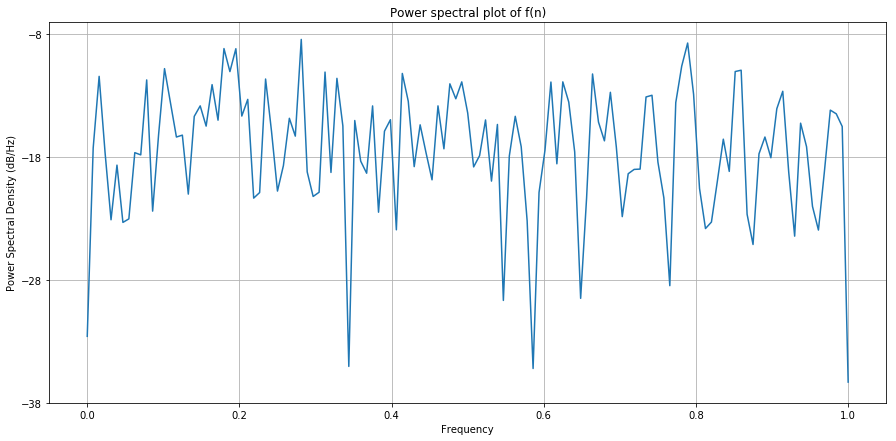

In [4]:
plt.figure(figsize=(15,7))
plt.psd(f)
plt.title('Power spectral plot of f(n)')
plt.show()

e1 and e2 behave like low pass processes

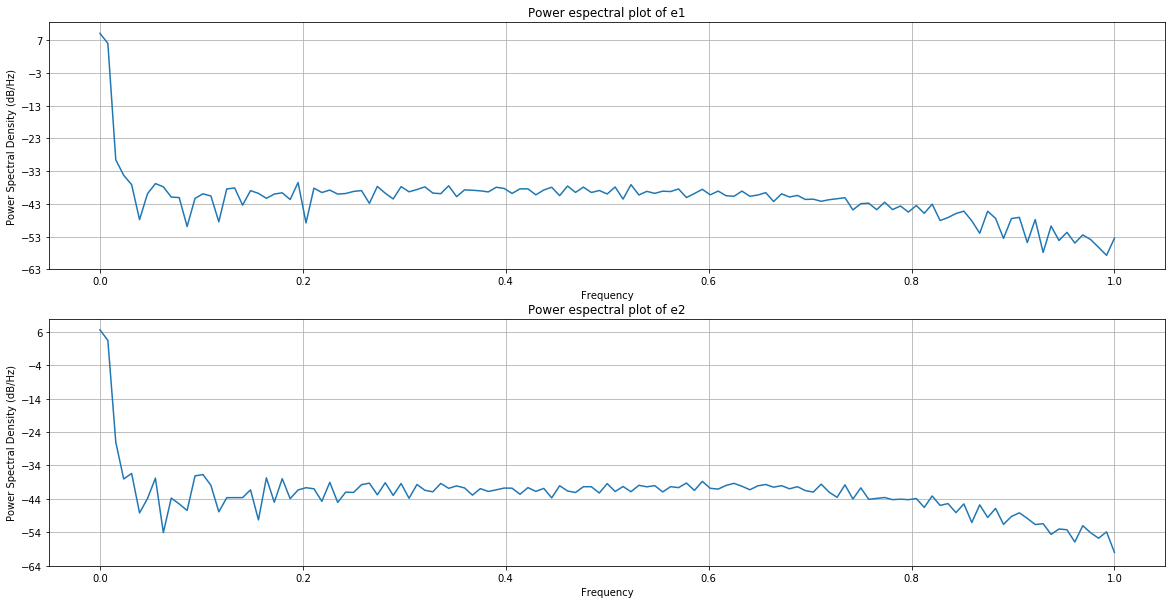

In [5]:
e1=np.zeros(N)
e2=np.zeros(N)
for i in range(N):
    e1[i]=-a1-w[i][0]
    e2[i]=-a2-w[i][1]

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.psd(e1)
plt.title('Power espectral plot of e1')
plt.subplot(212)
plt.psd(e2)
plt.title('Power espectral plot of e2')
plt.show()

# d)

In [25]:
#100 Monte Carlo simulations
w=np.zeros((N+1,2))#2 tap weights
fMC=np.zeros((N,100))
f_=np.zeros(N)
mu=0.005
fMC[0]=u[0]
w[0][0]=0
w[0][1]=0
std_v = 0.14
a1 = 0.1
a2 = -0.8

for MC in range(100):
    v = np.random.normal(mean_v, std_v, size=N)#noise
    u = np.zeros(N)
    u[0]=10
    for i in range(2,N,1):
        u[i] = -a1*u[i-1]-a2*u[i-2]+v[i]#AR process
    for i in range(N):
        fMC[i][MC]=u[i]-(np.dot(w[i][0],u[i-1])+np.dot(w[i][1],u[i-2]))#predictor error
        w[i+1][0]=w[i][0]+mu*u[i-1]*fMC[i][MC]#first tap weigh
        w[i+1][1]=w[i][1]+mu*u[i-2]*fMC[i][MC]#second tap weigh

for i in range(N):
    for j in range(100):
        f_[i]+=fMC[i][j]   
    f_[i]=f_[i]/100

    

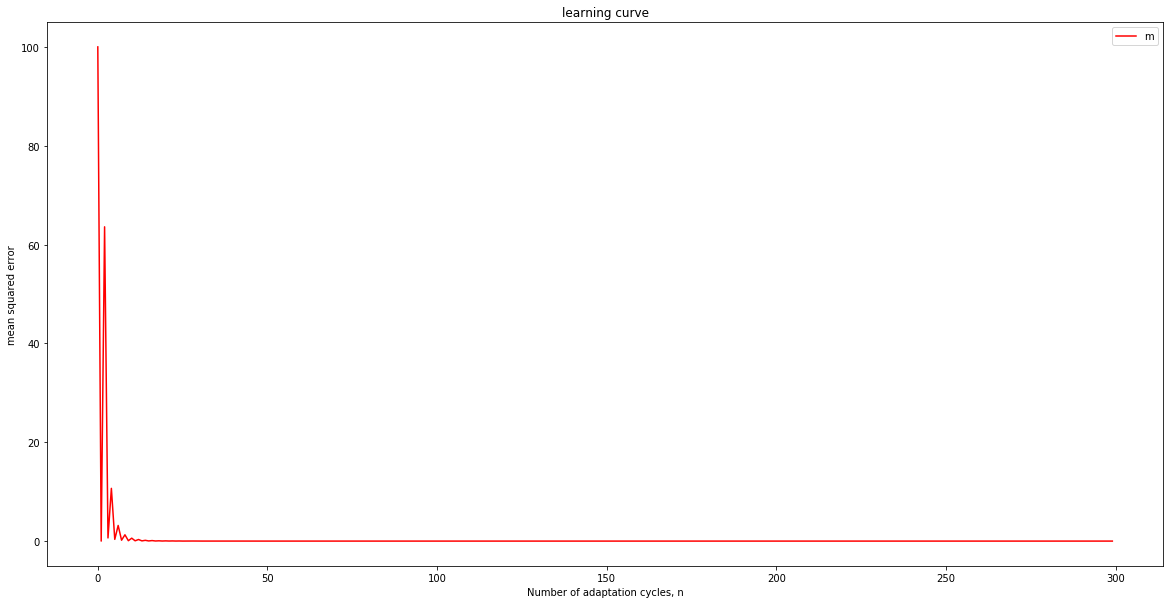

In [26]:
plt.figure(figsize=(20,10))
plt.plot(f_**2,'r')#learning curve, Mean square error vs number of adaptation cycles
plt.legend(('mu=0.05'))
plt.xlabel('Number of adaptation cycles, n')
plt.ylabel('mean squared error')
plt.title('learning curve')
plt.show()

# e)

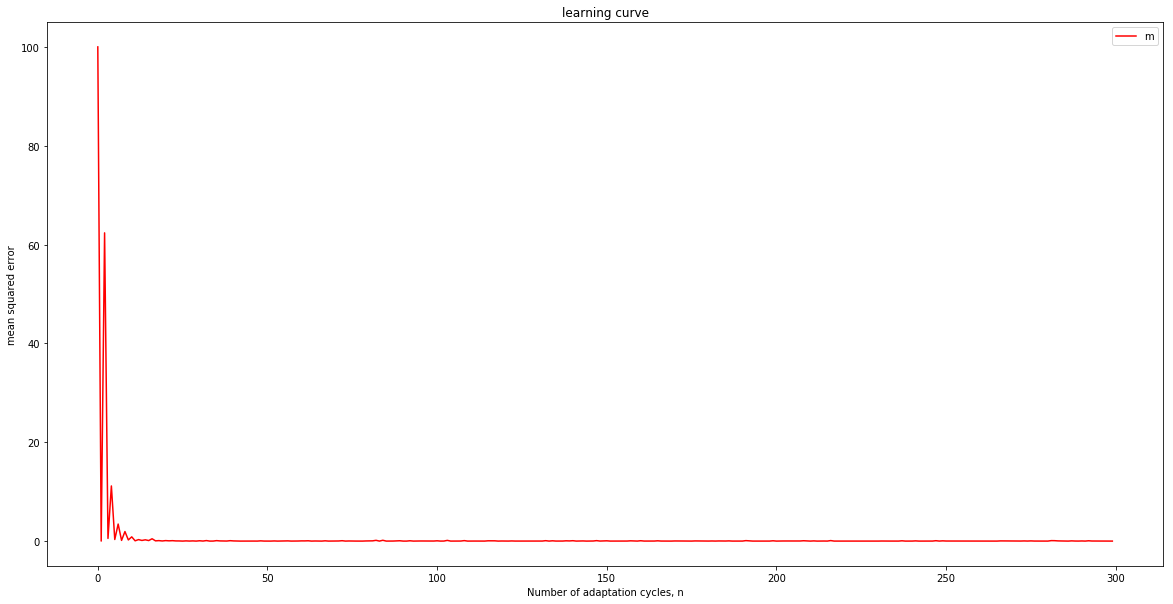

In [27]:
plt.figure(figsize=(20,10))
plt.plot(fMC[:,60]**2,'r')#learning curve, Mean square error vs number of adaptation cycles. I selected the 60th Monte Carlo run
plt.legend(('mu=0.05'))
plt.xlabel('Number of adaptation cycles, n')
plt.ylabel('mean squared error')
plt.title('learning curve')
plt.show()

In [36]:
j=np.zeros((N))
sigmaV=std_v**2
sigmaU=np.std(u)**2
for i in range(N):
    j[i]=sigmaV*(1+mu*sigmaU/2)+sigmaU*(a1**2-mu*sigmaV/2)*(1-mu*sigmaU)**(2*i)+sigmaU*(a2**2-mu*sigmaV/2)*(1-mu*sigmaU)**(2*i)

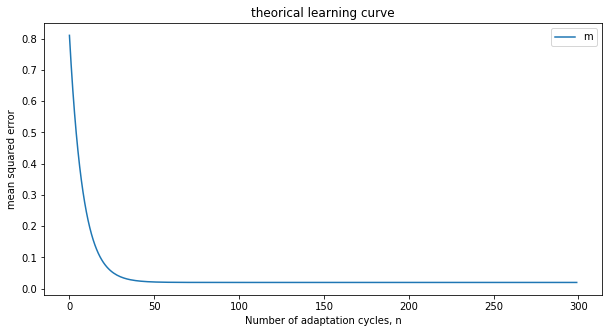

In [53]:
plt.figure(figsize=(10,5))
plt.plot(j)#learning curve, Mean square error vs number of adaptation cycles. I selected the 60th Monte Carlo run
plt.legend(('mu=0.05'))
plt.xlabel('Number of adaptation cycles, n')
plt.ylabel('mean squared error')
plt.title('theorical learning curve')
plt.show()

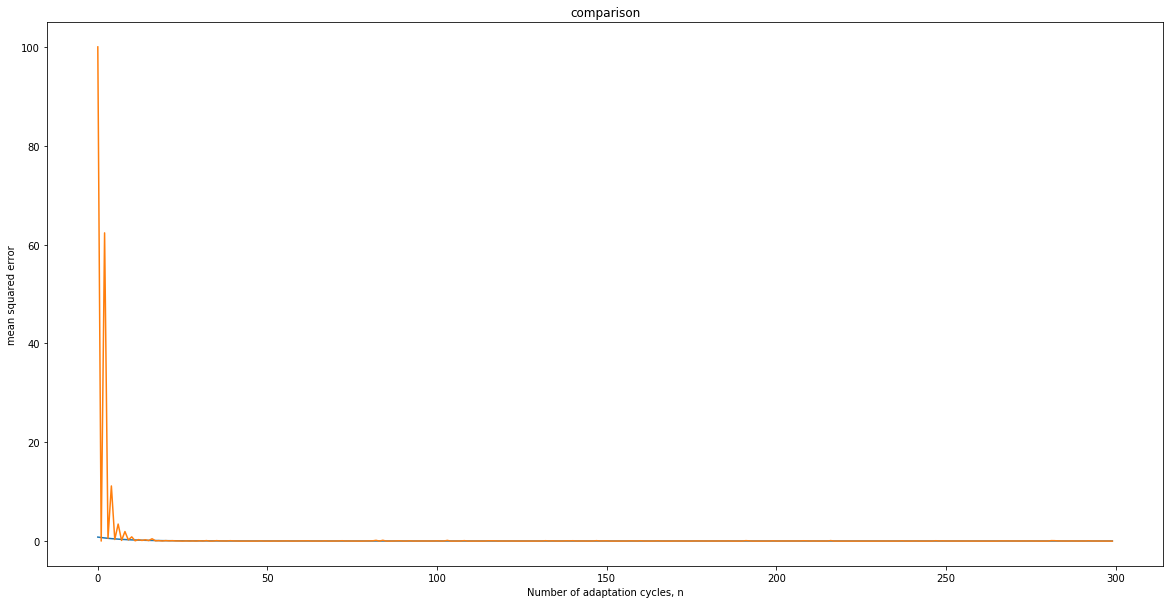

In [50]:
plt.figure(figsize=(20,10))
plt.plot(j, label='theorical')
plt.plot(fMC[:,60]**2,label='real')#learning curve, Mean square error vs number of adaptation cycles. I selected the 60th Monte Carlo run
plt.xlabel('Number of adaptation cycles, n')
plt.ylabel('mean squared error')
plt.title('comparison')
plt.show()